<a href="https://colab.research.google.com/github/andrewj-mit/Deep-Learning-Training/blob/main/Chest_X_Ray_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chest X-Ray Classification

1. Importing Necessary Libraries:

In [1]:
# Importing OS and Pathlib, so that we can work with files in our directories/PC
import os
import pathlib

# Some basic libraries that help us create dataframes and visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
plt.style.use("fivethirtyeight")
%matplotlib inline

# Deep Learning Libraries like Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Flatten

# Shows the Tensorflow and Keras Version
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

# To Suppress any Un-necessary warnings
import warnings
warnings.filterwarnings('ignore')


Tensorflow Version: 2.17.0
Keras Version: 3.4.1


2. Load the dataset

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:18<00:00, 224MB/s]
100% 2.29G/2.29G [00:18<00:00, 135MB/s]


In [3]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [4]:
data_dir_train = pathlib.Path('/content/chest_xray/train')
data_dir_test = pathlib.Path('/content/chest_xray/test')
data_dir_val = pathlib.Path('/content/chest_xray/val')

In [5]:
# Checking the number images in all the paths defined above
print("Number of Images in Train:", len(list(data_dir_train.glob("*/*.jpeg"))))
print("Number of Images in Test:", len(list(data_dir_test.glob("*/*.jpeg"))))
print("Number of Images in Validation:", len(list(data_dir_val.glob("*/*.jpeg"))))

Number of Images in Train: 5216
Number of Images in Test: 624
Number of Images in Validation: 16


In [6]:
# Here, we are defining some variables which will be commonly used in the further codes
height = 150
width = 150
batch_size = 16
seed = 42 # For reproducibility

In [7]:
# Next! In this step, we are going to use the method "image_dataset_from_directory()" to construct a dataset!

# First we ask Keras to create a "training" dataset with 0.2 as validation split.

train_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.2,
subset='training',
image_size=(height,width),
batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


In [8]:
# Second we ask Keras to create a "validation" dataset with 0.2 as validation split.

val_ds = keras.preprocessing.image_dataset_from_directory(
data_dir_train,
seed=seed,
validation_split=0.2,
subset='validation',
image_size=(height,width),
batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


In [9]:
# Finally we are storing all the available class names from the dataset. (NORMAL and PNEUMONIA)

# This also ensures, we have created the dataset successfully!

class_names = train_ds.class_names
class_names

['NORMAL', 'PNEUMONIA']

3. Visualizing Our Data:

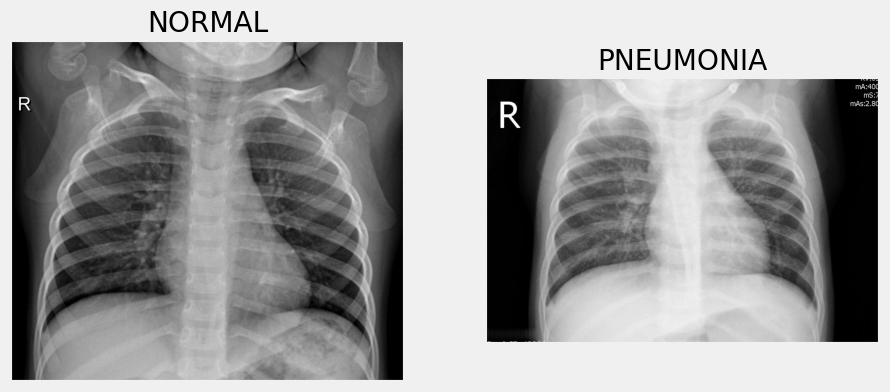

In [10]:
# Defining the Canvas size
plt.figure(figsize=[10,8])

# Next we are just picking one image from the unique categories and displaying them:
for index, classes in enumerate(class_names):
    for images in train_ds.file_paths:
        if classes in images:
            img = image.imread(images)
            plt.subplot(1,2,index+1)
            plt.imshow(img, cmap=plt.cm.gist_gray)
            plt.xticks([])
            plt.yticks([])
            plt.title(str(classes))
            break
plt.show()


4. Building Our CNN Model:

In [11]:
# Here we start building our model in Keras:

model = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2)
])

In [12]:
# Next we compile this model where we define the optimizer, loss function and the metric which we will use to evaluate.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# Here we will use visualkeras to visualize the CNN Model that we created

# First step: Install Visual Keras
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 17.2 MB/s eta 0:00:00


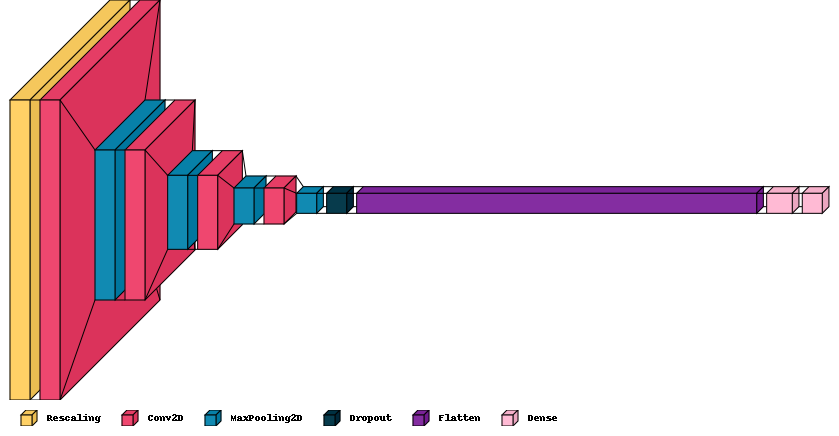

In [14]:
# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=2, legend=True)


In [15]:
# Finally we are going to train our model for 20 epochs
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 66s 169ms/step - accuracy: 0.8304 - loss: 0.3573 - val_accuracy: 0.9521 - val_loss: 0.1292
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 41s 159ms/step - accuracy: 0.9604 - loss: 0.1069 - val_accuracy: 0.9626 - val_loss: 0.1032
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 85s 172ms/step - accuracy: 0.9657 - loss: 0.0866 - val_accuracy: 0.9722 - val_loss: 0.0848
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 41s 157ms/step - accuracy: 0.9734 - loss: 0.0682 - val_accuracy: 0.9751 - val_loss: 0.0941
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 44s 169ms/step - accuracy: 0.9804 - loss: 0.0582 - val_accuracy: 0.9712 - val_loss: 0.0982
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 81s 165ms/step - accuracy: 0.9851 - loss: 0.0454 - val_accuracy: 0.9789 - val_loss: 0.0834
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 73s 132ms/step - accuracy: 0.9849 - loss: 0.0419 - val_accuracy: 0.9703 - val_loss: 0.0926
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 50s 166ms/step - accuracy: 0.9844 - loss: 0